In [125]:
hw_done = True

# Homework 6
### ASTR-324, University of Washington


## Problem

Quoting from [Sesar et al. (2017)](https://iopscience.iop.org/article/10.3847/1538-3881/aa661b):

> RR Lyrae stars are old ($\mathrm{age}\gt 10$ Gyr), metal-poor ($[\mathrm{Fe}/{\rm{H}}]\ \lt \ -0.5$ dex), pulsating horizontal branch stars with periodically variable light curves (periods ranging from 0.2 to 0.9 days; Smith 2004). They are bright stars (${M}_{{\rm{V}}}=0.6\pm 0.1$ mag) with distinct light curves, which makes them easy to identify with time-domain imaging surveys, even to large distances (5–120 kpc for surveys with a $14\lt V\lt 21$ magnitude range; e.g., Sesar et al. 2010). These properties, and the fact that almost every Milky Way dwarf satellite galaxy has at least one RR Lyrae star (including the faintest one, Segue 1; Simon et al. 2011), open up the exciting possibility of locating very-low-luminosity Milky Way dwarf satellites by using distant RR Lyrae stars, as first proposed by Sesar et al. (2014; also see Baker & Willman 2015).

The file `data/rrlyra.dataset.txt` contains observations of a single RRLyrae, found in a dwarf galaxy, over approximately a 3-month period, with the first column being the time (in days), and the second column being the $i$-band magnitude, $m_i$.

* Compute the average apparent magnitude of the RR Lyrae, $\bar{m_i}$
* Find the most likely period $P$ of the RR Lyrae, using a Lomb-Scargle periodogram.
* RR-Lyrae observe a period-luminosity relation in the $i$ band:

  $$ M_i = -1.77 \log_{10} \frac{P}{0.6\,\mathrm{days}} + 0.46 $$
  
  Use this relation, and the estimated period $P$, to estimate the absolute magnitude $M_i$ of this RR Lyra.
* Using the RR Lyra's absolute magnitude $M_i$, and the average apparent magnitude $\bar{m_i}$, estimate the distance to the dwarf galaxy where this star resides.

The data:

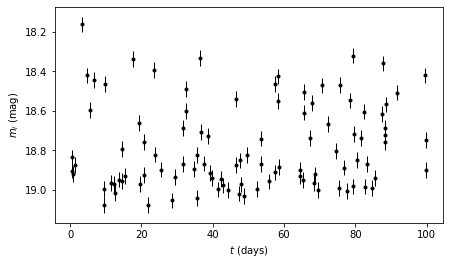

In [109]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

# read data
data = np.loadtxt('data/rrlyra.dataset.txt', unpack=True)
t, y_obs, sigma_y = data

# plot data
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.5, 0.7, 0.45, 0.25])
ax.errorbar(t, y_obs, sigma_y, fmt='.', lw=1, c='k')
ax.set_xlabel(r'$t$ (days)')
ax.set_ylabel(r'$m_i$ (mag)')
ax.invert_yaxis()

## Solution

In [110]:
# To remain consistent with the textbook, we'll use some functions that have 
# been deprecated in recent versions of astroML. This code silences the
# distracting deprecation warnings related to these.

import warnings
from astroML.utils.exceptions import AstroMLDeprecationWarning
warnings.filterwarnings("ignore", category=AstroMLDeprecationWarning)

In [111]:
def plot_phased(t, y_obs, P, ax = None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(14,7))

    phase = t / P - np.floor(t/P)
    phase = phase + 0.5 - np.floor(phase + 0.5) ##
    ax.errorbar(phase, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
    ax.set_xlabel('phase')
    ax.set_ylabel('flux')
    ax.set_xlim(-0.05, 1.05)
    
def plot_LS(t, y_obs, P_fit, sig1, sig5):
    #------------------------------------------------------------
    # Plot the results
    fig = plt.figure(figsize=(14, 7))
    fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

    # First panel: the data
    ax = fig.add_subplot(211)
    plot_phased(t, y_obs, P_fit, ax=ax)

    # Second panel: the periodogram & significance levels
    ax1 = fig.add_subplot(212, xscale='log')
    ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
    ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black', label="99% significance level")
    ax1.plot([period[0], period[-1]], [sig5, sig5], '-.', c='black', label="95% significance level")
    ax1.legend()

    ax1.annotate("", (P_fit, 0.95), (P_fit, 1.10), ha='center', arrowprops=dict(arrowstyle='->'))

    ax1.set_xlim(period[0], period[-1])
    ax1.set_ylim(-0.05, 1.15)

    ax1.set_xlabel(r'period (days)')
    ax1.set_ylabel('power')

    # Twin axis: label BIC on the right side
    ax2 = ax1.twinx()
    ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
    ax2.set_ylabel(r'$\Delta BIC$')

    ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
    ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
    ax1.xaxis.set_major_locator(plt.LogLocator(10))
    ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

    plt.show()

In [112]:
dy = t*0 + 0.2

In [113]:
from astroML.time_series import lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#------------------------------------------------------------
# Compute periodogram
period = 10 ** np.linspace(-1, 0, 10000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

# find the highest peak
P_fit = period[PS.argmax()]

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=500, random_state=0)
sig1, sig5 = np.percentile(D, [99, 95])

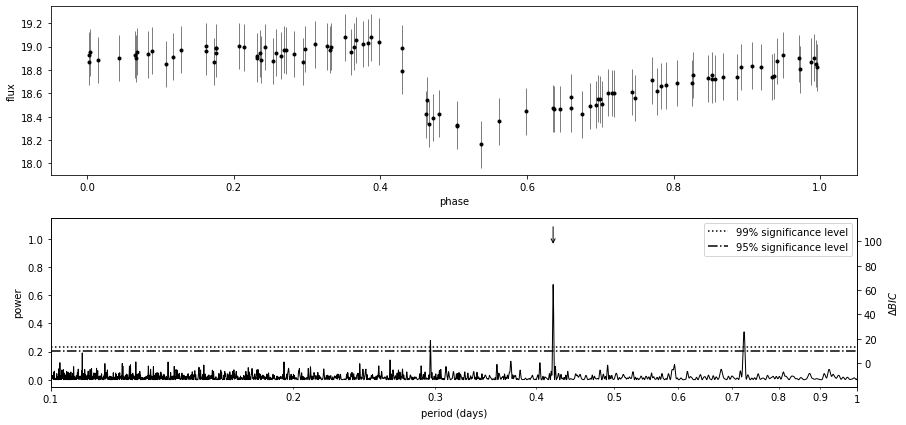

Location of highest periodogram peak, P_fit = 0.420 days


In [114]:
plot_LS(t, y_obs, P_fit, sig1, sig5)
print(f"Location of highest periodogram peak, P_fit = {P_fit:.3f} days")

In [115]:
from statistics import mean
import math

In [116]:
average_apparent_magnitude = mean(y_obs)
print(average_apparent_magnitude)

18.781323088958246


In [117]:
period = P_fit

In [118]:
#def absolute_magnitude(period):
    #absolute_magnitude = -1.77 * math.log10((period)/(0.6)) + 0.46
    #return(absolute_magnitude)

In [119]:
#absolute_magnitude

In [120]:
absolute_magnitude = -1.77 * math.log10((period)/(0.6)) + 0.46

In [121]:
absolute_magnitude

0.734330413449076

In [122]:
distance_modulus = (10) * 10**((average_apparent_magnitude - absolute_magnitude)/5)

In [123]:
distance_modulus

40681.64775364704

In [124]:
print("The estimated distance to the dwarf galaxy where the RR Layrae star resides :", distance_modulus, "pc")

The estimated distance to the dwarf galaxy where the RR Layrae star resides : 40681.64775364704 pc
